In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from gwaxion import physics
import pandas as pd

In [2]:
# create an array of BH masses

mbhs_array = np.logspace(0, 3, 100)
distance = 5E6 * physics.PC_SI

In [8]:
h0s, fgws, alphas, mbhs = [], [], [], []
for mbh in mbhs_array:
    bh = physics.BlackHole(mass=mbh, chi=0.7, msun=True)
    h0s_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.0001)
    mbhs = np.concatenate([mbhs, [mbh]*len(h0s_loc)])
    h0s = np.concatenate([h0s, h0s_loc])
    fgws = np.concatenate([fgws, fgws_loc])
    alphas = np.concatenate([alphas, alphas_loc])

df1 = pd.DataFrame({'h0': h0s/distance, 'fgw': fgws, 'alpha': alphas, 'mbhs': mbhs})
df1 = df1[df1['h0']>1E-30]

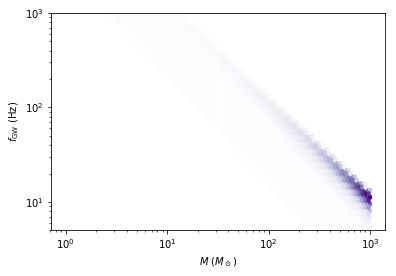

In [10]:
# plot

norm = matplotlib.colors.LogNorm(vmin=df1['h0'].min(), vmax=df1['h0'].max())

plt.hexbin(df1['mbhs'], df1['fgw'], C=df1['h0'], xscale='log', yscale='log', cmap='Purples')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.ylim(5, 1e3)
plt.show()
plt.close()

In [11]:
# try new shortcut

fgws_array = np.logspace(0, 3, 1000)

h0s, fgws, mbhs = [], [], []
for mbh in mbhs_array:
    h0s_loc = physics.h0_scalar_brito(mbh, fgws_array, chi_i=0.7)
    mbhs = np.concatenate([mbhs, [mbh]*len(h0s_loc)])
    h0s = np.concatenate([h0s, h0s_loc])
    fgws = np.concatenate([fgws, fgws_array])

df2 = pd.DataFrame({'h0': h0s/distance, 'fgw': fgws, 'mbhs': mbhs})
df2 = df2[df2['h0']>1E-30]

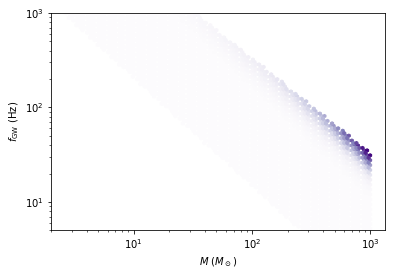

In [17]:
plt.hexbin(df2['mbhs'], df2['fgw'], C=df2['h0'], xscale='log', yscale='log', cmap='Purples')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.ylim(5, 1e3)
plt.show()
plt.close()

In [16]:
print df1['h0'].max()
print df2['h0'].max()

6.3783243434079055e-25
1.2381218322400303e-21


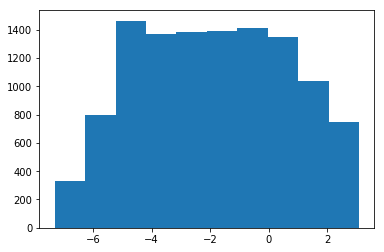

In [29]:
ratio = df1['h0']/df2['h0']
ratio = ratio[-ratio.isna()]

plt.hist(np.log10(ratio.values))
plt.show()
plt.close()